## Equation to solve: $\partial_t u_y = \nu\partial_x^2 u_y - g$, where $g$ is some scaled gravity (depending on the slope of the incline).

## Note: for animation to run well, might need to restart the kernel in between runs

In [1]:
"""
Visualizing lava flow
Author: Zhongan Lin
"""
%matplotlib notebook 
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Grid & diffusion parameters
angle = 45
D = 10 # viscosity
H = 10 # width of lava layer
L = 15 # length over which lava flow is simulated
line_density = 1.5 # For streamplot
Ngrid = 100
Nsteps = 100
dt = 0.3
dx = H/Ngrid
g = 10*np.sin(angle * np.pi/180) #gravity
beta = D*dt / (dx**2)

x = np.linspace(0, H, Ngrid)

# Initial condition
u = np.zeros(Ngrid)
u_final = g/D * (np.copy(x)**2 / 2 - H*np.copy(x))

# # Plot setup
# plt.ion()
# fig = plt.figure()
# ax = fig.add_subplot(111)
# fig.show()
# fig.canvas.draw()

# Setting up the streamplot
Y, X = np.mgrid[0:L:400j, 0:H:Ngrid*1j] 
u_final = g/D * (X**2 / 2 - H*X)

In [5]:
# Evolution
for i in range(Nsteps):

    # Diffusion operation matrices
    A = np.eye(Ngrid)*(1+2*beta) + np.eye(Ngrid,k=1)*(-beta) + \
        np.eye(Ngrid,k=-1)*(-beta)
  
    # Boundary conditions
    A[Ngrid-1, Ngrid-1] = 1 + beta # No stress at air interface
    A[0,0] = 1 # No slip at slope interface
    A[0,1] = 0
     
    # Solve for next time step
    u_inter = u-g*dt # Including source while satisfying boundary condition
    u_inter[0] += g*dt
    u_inter[-1] += g*dt
    u = np.linalg.solve(A, u_inter)
    
    # Update plot
    ax.clear()
    ax.set_xlim([0, H])
    ax.set_ylim([0, L])


    ax.set_xlabel('y')
    ax.set_ylabel('x')
    # Final state in the background
    ax.streamplot(X, Y, np.zeros(np.shape(Y)), u_final,
                 density = [line_density, line_density])
    
    fig.canvas.draw()
    plt.pause(0.001)

<IPython.core.display.Javascript object>


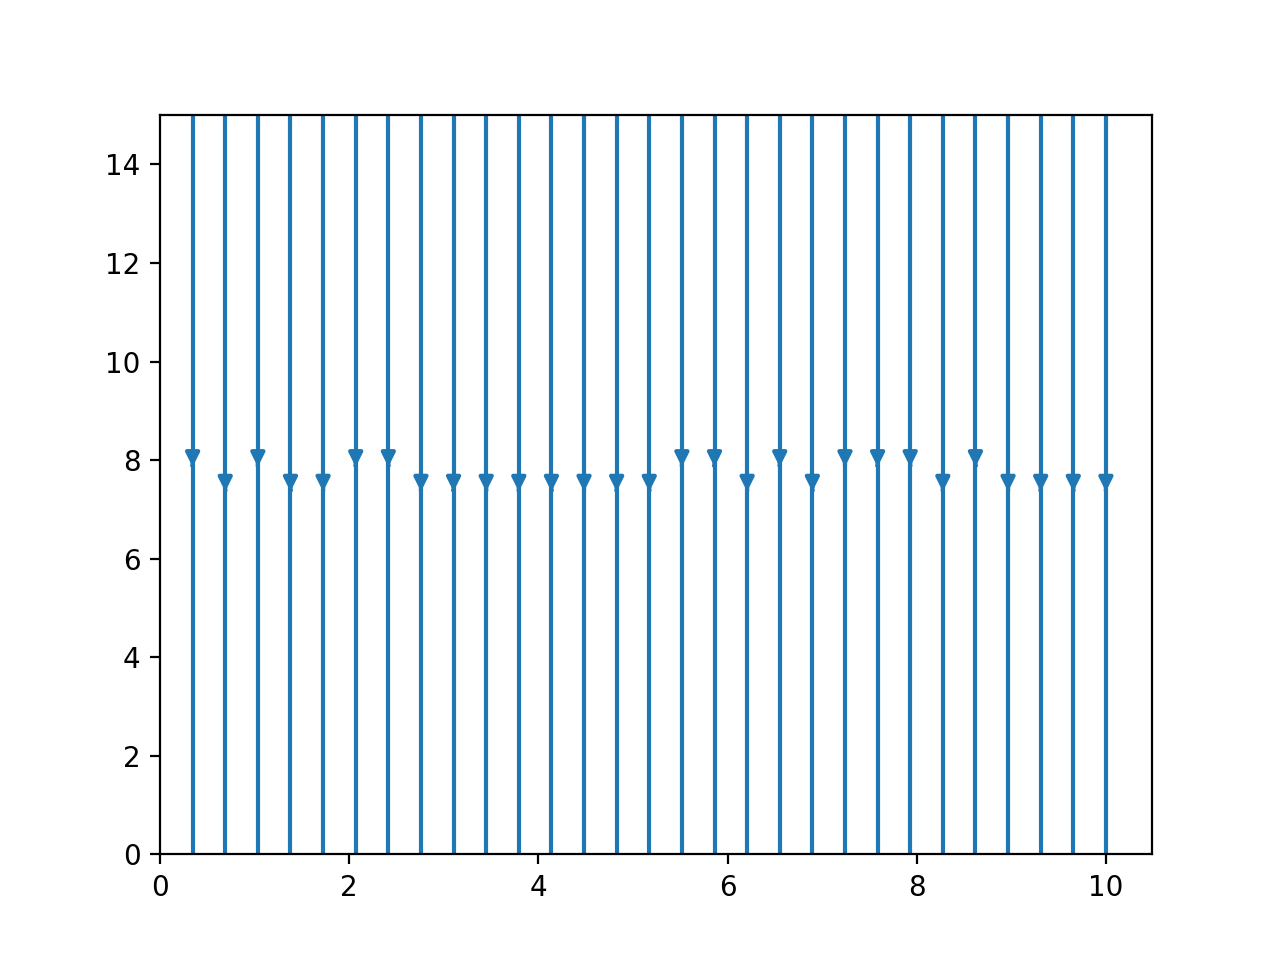

In [3]:
plt.streamplot(X, Y, np.zeros(np.shape(Y)), u_final)
plt.show()